<a href="https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Lectures/Lec13.1-KMeans_color.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Color quantization with k-means
---

This is the lecture note for **k-means** clustering with application on color quantization.

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to k-means clustering. I encourage you to read further about k-means. </p>

Read more:

- [OpenCV](https://docs.opencv.org/4.x/index.html)
- [imread() - OpenCV](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
- [Color quantization - wikipedia](https://en.wikipedia.org/wiki/Color_quantization)

---


## Image processing

We use OpenCV in Python for image processing. Install it through

```
pipenv install opencv-python
```

This library has existed for very long time and the documentation looks very old, but it is very useful for various kinds of image processing

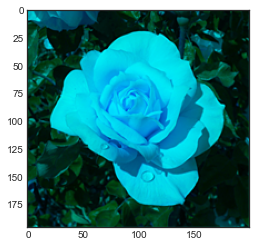

In [2]:
import matplotlib.pyplot as plt 
import cv2
import numpy as np 

plt.style.use("seaborn-white")

# blue green red
img_BGR = cv2.imread("Data/blomma.png")

flower=img_BGR
plt.imshow(flower);

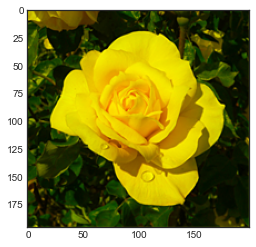

In [3]:
# blue green red
img_BGR = cv2.imread("Data/blomma.png")

# convert BGR to RGB 
flower = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(flower);

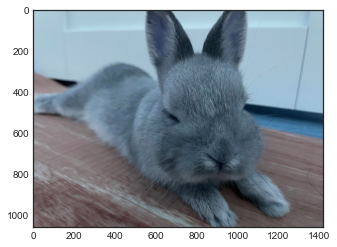

In [4]:
img_BGR = cv2.imread("Data/bella2.jpeg")
plt.imshow(img_BGR);

(1063, 1417, 3)


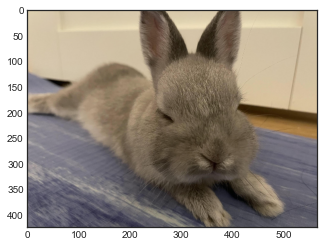

In [5]:
img_BGR = cv2.imread("Data/bella2.jpeg")
img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
print(img_BGR.shape)
# make image smaller
rabbit = cv2.resize(img, (int(img.shape[1]*.4), int(img.shape[0]*.4)))
# height: shape[1], width:shape[0]

plt.imshow(rabbit)


---
## Color quantization 
Reduce number of colors in an image by replacing with cluster center. These cluster centers can be computed with k-means algorithm.

- useful for simple color segmentation 
- useful when a display only can show a small number of colors
- can be used for compression 

First we flatten the each of the 3 matrices (R, G, B) to one dimensional vector for each color channel resulting in:

| R   | G   | B   |
| --- | --- | --- |
| R1  | G1  | B1  |
| R2  | G2  | B2  |
| ... | ... | ... |
| RN  | GN  | BN  |

Using k-means with $k$ as the number of colors, we find the cluster centers and give that color to every point in that cluster. Finally reshape it back to original shape.

Cluster centers: [[0.12594709 0.16445658 0.        ]
 [0.86960004 0.75798583 0.        ]]
Cluster labels: [1 1 1 ... 0 0 0]


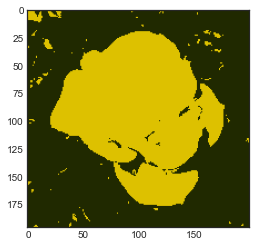

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# note that the wildcard -1 calculates row*columns
X = flower.reshape(-1, 3)

# need to normalize data to 0-1
scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)

kmean = KMeans(2)
kmean.fit(scaled_X)

print("Cluster centers:",kmean.cluster_centers_)
print("Cluster labels:", kmean.labels_)

# 1 picks second cluster center, all 0 picks first cluster center
quantized_color_space = kmean.cluster_centers_[kmean.labels_]

quantized = quantized_color_space.reshape(flower.shape)
plt.imshow(quantized)


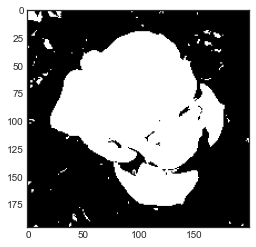

In [7]:
# segmentation
mask = (quantized[:,:,1] >.75)
plt.imshow(mask, cmap = "gray")

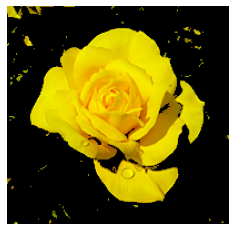

In [8]:
segmented_flower = (mask[:, :, None]*flower)
plt.imshow(segmented_flower)
plt.axis("off");


---
## Reduce colors

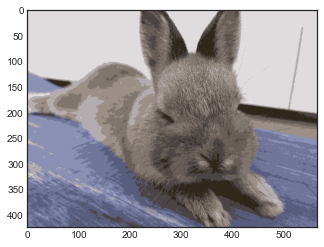

In [33]:
X = rabbit.reshape(-1, 3)
scaled_X = scaler.fit_transform(X)

# for example a device can only show 10 discrete colors

kmean = KMeans(10)
kmean.fit(scaled_X)
quantized_color_space = kmean.cluster_centers_[kmean.labels_]

quantized = quantized_color_space.reshape(rabbit.shape)
plt.imshow(quantized)
plt.axis('off')
#plt.savefit('fin_kanin.png');